In [1]:
#Standard

import pandas as pd
import numpy as np
from pandas import Series,DataFrame
from numpy.random import randn

# Stats

from scipy import stats

# Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
flight_dframe = sns.load_dataset('flights')

In [3]:
flight_dframe.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [4]:
flight_dframe = flight_dframe.pivot('month','year','passengers')

In [5]:
flight_dframe

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


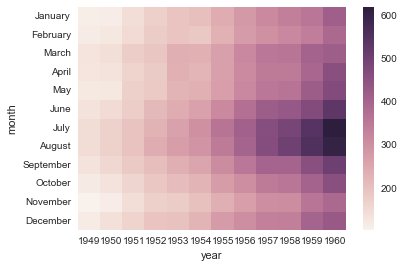

In [6]:
sns.heatmap(flight_dframe)

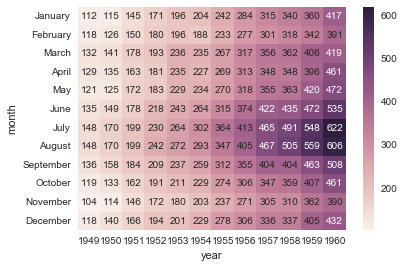

In [9]:
sns.heatmap(flight_dframe,annot=True,fmt='d')

In [10]:
yearly_flights = flight_dframe.sum()

In [11]:
yearly_flights

year
1949    1520
1950    1676
1951    2042
1952    2364
1953    2700
1954    2867
1955    3408
1956    3939
1957    4421
1958    4572
1959    5140
1960    5714
dtype: int64

In [12]:
years = Series(yearly_flights.index.values)

In [13]:
years

0     1949
1     1950
2     1951
3     1952
4     1953
5     1954
6     1955
7     1956
8     1957
9     1958
10    1959
11    1960
dtype: int64

In [14]:
years = DataFrame(years)

In [15]:
years

,0
0,1949
1,1950
2,1951
3,1952
4,1953
5,1954
6,1955
7,1956
8,1957
9,1958


In [16]:
flights = Series(yearly_flights.values)

In [17]:
flights

0     1520
1     1676
2     2042
3     2364
4     2700
5     2867
6     3408
7     3939
8     4421
9     4572
10    5140
11    5714
dtype: int64

In [18]:
flights = DataFrame(flights)

In [19]:
flights

,0
0,1520
1,1676
2,2042
3,2364
4,2700
5,2867
6,3408
7,3939
8,4421
9,4572


In [20]:
year_dframe = pd.concat((years,flights),axis=1)

In [21]:
year_dframe

,0,0
0,1949,1520
1,1950,1676
2,1951,2042
3,1952,2364
4,1953,2700
5,1954,2867
6,1955,3408
7,1956,3939
8,1957,4421
9,1958,4572


In [22]:
year_dframe.columns = ['Year','Flights']

In [23]:
year_dframe

,Year,Flights
0,1949,1520
1,1950,1676
2,1951,2042
3,1952,2364
4,1953,2700
5,1954,2867
6,1955,3408
7,1956,3939
8,1957,4421
9,1958,4572


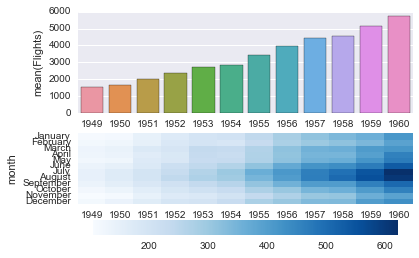

In [27]:
f,(axis1,axis2) = plt.subplots(2,1)
sns.barplot('Year',y='Flights',data=year_dframe,ax=axis1)
sns.heatmap(flight_dframe,cmap='Blues',ax=axis2,cbar_kws={'orientation':'horizontal'})